# Introduction to Primitives on Qiskit Runtime

# Table of Contents
- **[Story](#Story)**
- **[Part I: Introduction to Primitives](#Part-I:-Introduction-to-Primitives)**
- **[Part II: Getting Started with Qiskit Runtime](#Part-II:-Getting-Started-with-Qiskit-Runtime)**
- **[Part III: How to Use Primitives](#Part-III:-How-to-Use-Primitives)**
    - **[Exercise 1: build the Bernstein Vazirani function](#exercise1)**
    - **[Exercise 2: bind parameters to a parametrized circuit using `Sampler`](#exercise2)**
    - **[Exercise 3: build an Estimator routine to compute the expectation values of Hamiltonians](#exercise3)**
- **[Part IV: Error Mitigation Opening](#Part-IV:-Introduction-to-Error-Mitigation-and-Error-Suppression-on-Qiskit-Runtime)**
    - **[Exercise 4: choose the correct statements about error correction](#exercise4)**
- **[Part V: Example Using Both Primitives](#Part-V:-Example-Using-Both-Primitives---Unscrambling-the-message!)**
    - **[Exercise 5: apply noise mitigation techniques](#exercise5)**
    - **[Exercise 6: verify what the message is](#exercise6)**

# Part I: Introduction to Primitives

Primitives are meant to serve as an foundational, elementary, building blocks for users to perform quantum computations, developers to implement quantum algorithms, and researchers to solve complex problems and deliver new applications.

But before we go into its significance in terms of quantum computation, let's examine what the term "primitive" actually means and what it implies for us.

On asking to define a primitive element, a **biologist** may likely respond: "A character, trait, or feature that is inherited from the common ancestorial group". A **mathematician's** answer to the same question may be along the lines of, "For finite fields, an element that is a generator of multiplicative element groups of that field".  A **designer working on CAD models** might describe it to you as, "The simplest available shape on a system that can be used to build upon complex geometric forms."

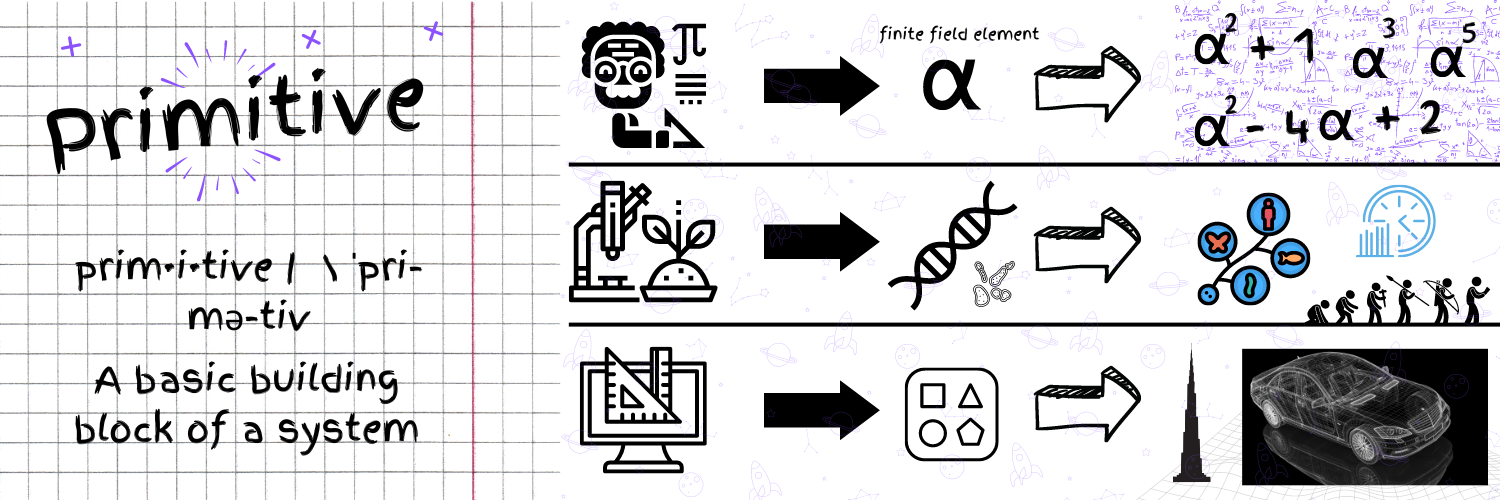

What do we observe from all these responses? All definitions seem to have one thing in common. They ultimately define primitive being a **basic element** that serves as a building block for more complex elements.

Now, if we were to look at it with respect to general computing, what would it mean when we term something as "primitive"? Let's take a look at the concept of language primitives. A language primitive can be defined as a simplest, indivisible element available in a programming language. You have probably heard that everything in a computer is just stored in binary; as zeros and ones, and that is completely true. However, if we were to take binary digits as a primitive construct for programming languages, we would really have a tough time to get things done. So a more appropriate approach would be to define the term primitive with respect to a high level programming language, in such a way that we categorise them into something, _that while being indivisible_, it is still easier to understand and program with.

One good example for this in our language primitive concept are primitive data types. Depending on the language you choose, you will have data types that are generally indivisible and these are used to construct more complex datatypes depending on how you choose using them. For example: `int`, `float`, `string` and `boolean` are _generally considered_ to be the primitive data types in Python, whereas an **array of strings** or, a **list of names**, a **tuple of decimal coordinates** or **set of integers** are non-primitive data types that are built upon the primitive data types.

Now, can we define the same with respect to a general function in programming? You can define a primitive function as a basic interface or segment of code that can be used to build more complex and sophisticated program elements or interfaces depending on how you use them.

## Ok, what does this have to do with Quantum?

As explained above with respect to a language primitive, although we know that binary digits or machine-code are technically core primitive constructs as a program is compiled down, we still define higher level primitive terms with categorisations that enable us to build a program more accessibly and not at a lower machine code level. Most of the time we expect most major compiled languages to have efficient compiler routines built in, and given that, we are expecting an optimized execution workflow which is optimized for the systems we own. Therefore we can create our programs using the programming language's defined primitives and syntax.

**So now the question with respect to Quantum: Is there a way to define a similar construct for a quantum computation routine and workflow?**

## Introducing the Qiskit Runtime Primitives:

![Qiskit Runtime architecture](https://globalcatalog.cloud.ibm.com/api/v1/b6049020-80f4-11eb-a0f7-e35ec9b4054f/artifacts/cache/c8857855ada52ce6b2cc37900094c34a-public/Qiskit_Runtime_Diagram_Wide_v2.png)

To maximize a given _Quantum workflow_, which is predominantly a QPU on cloud, we now have a computing programming model that conforms to a service which is built to optimize workloads with efficient execution at scale. Since last year, the Qiskit Runtime service has been built on the concept of containerized execution; an execution model, where you have multiple elements of computation packaged and run portably on any system. Rather than sending single circuits to cloud, the entire program is packaged with its dependencies to run on cloud, thereby saving latency and reducing overhead for iterative loops.

With newer developments in the Qiskit Runtime service, we now have updated capabilities not just in the Runtime service, but a focus on the programming experience for scale with the introduction for a new programming model which acts as an interface to the Qiskit Runtime service: **Qiskit Runtime Primitives**

## Qiskit Runtime Primitives: Introducing Sampler and Estimator

To start off defining primitives for quantum, we have two candidates (for now). Although there are several ways to define the fundamental components for a quantum computational procedure, there will be more additions to this primitives construct down the line. For now, let's stick to two basic primitives which we define here. 

With respect to the key information point of interest here, the core capability of quantum computers that sets them apart from classical computers is their ability to generate non-classical probability distributions at their outputs. The inherent nature of highly probabilistic computational results obtained needs us to have multiple runs for the same circuit to generate usable information in the form of probability distributions. The native operations that we can do with probability distributions are to sample from it or to estimate quantities from it. 

Based on these two information points of interest here which are: **a) Sampling probability distributions** and **b) Estimating a value**, we arrive at our proper named two primitives: **The Sampler** and **The Estimator**

### The Sampler

The Sampler essentially does what it says in its name. By sampling from its output, it estimates the entire quasi-probability distribution of a given quantum circuit. This is a program that takes a user circuits as an input and generates an error-mitigated readout of quasiprobabilities. This provides users a way to better evaluate shot results using error mitigation and enables them to more efficiently evaluate the possibility of multiple relevant data points in the context of destructive interference.

This is in essence very much similar to the familiar output of "counts" which you usually get when you run a circuit, but here, you obtain a quasi-probability distribution output as a result of the error mitigation routine involved.

Simply put, you have access to a greater range of information data points that you can use however you like. The information obtained from a quasi-probability distribution representation may be of more relevance for investigating likelihoods of true probability distributions and computing unbiased expectation value points in exchange for a sampling overhead. These distributions, broadly speaking, can behave similar to true probability theory in some sense with the difference being that they have a few constraints of the original theory relaxed, one of which is the possiblity of having negative data points representing "negative" probability (but collectively still summing up to 1). These, while should not be mistaken for true probabilities, can be estimated to a nearest true probability distribution upto certain error bounds based on the context of usage. Few example use cases where Sampler could be of interest are: Grovers search, QSVM routines, Stabilizer computation, Optimization routines etc. 

While the Sampler gives the complete distribution over the entire output, there may be times where you may be interested in information about particular outcomes. Let us look at **the Estimator**!

### The Estimator

The Estimator essentially calculates and interprets expectation values of operators of interest. This is a program interface that takes circuits and observables and allows users to selectively group between circuits and observables for execution to efficiently evaluate expectation values and variances for a given parameter input. This primitive allows users to efficiently calculate and interpret expectation values of quantum operators required for many algorithms.

Those who are most interested in finding a final solution to a given problem — but who don’t need to examine the full distribution of counts — will find the Estimator primitive more useful. This routine is something that can be useful to basically most near-term quantum algorithms, the most common examples to be taken are the variational class of algorithms. The Estimator calculates expectation values of quantum observables in addition to a circuit so they are essential to be an input. Such observables can encode a large variety of things such as the electronic structure of a molecule, the cost function for an optimization problem and much more.

## Why use Qiskit Runtime?

So now the question arises: why even bother with this new programming paradigm at all? Answer: To interface with the Qiskit Runtime service and leverage the powerful service and framework on which it is built.

Re-calling back to the explanation in section 1 where we define language primitives that facilitate us to develop on a higher level while relying on the compiler for having an optimized workflow, you can expect Runtime to address these most common areas:

- **Efficiency** : Highly optimized routines and options for iterative workloads designed for quantum backends
- **Latency** : Scheduling, job prioritizing and shared caching using the Sessions framework for lower latency and faster turn result times.
- **Consistency** : Consistent programming model to build upon complex routines across the service with newer additions to complement the existing primitive model
- **Customizablity** : Management of iterative routines with customized circuits based on its context and paramaters of the job
- **Error Mitigation and Suppression** : Error mitigation and suppression research advancements through simple abstracted interfaces for increased quality of information.

With the Qiskit Runtime service, you can leverage these advantages right away using the primitive programming models as described. This notebook shall introduce how to use the Sampler and Estimator primitives with the Sessions framework and showcase a few of the error mitigation strategies that are currently available and still growing. The subsequent notebooks will build upon this intuition and showcase how you can utilize this primitive programming model and build upon some of the more common algorithmic routines in domains of Machine Learning, Optimization and Chemistry

Let's take a look how to use the Qiskit Runtime service and build programs upon the primitives construct.

###  Importing the required libraries

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import Aer
# %config InlineBackend.figure_format='retina'

# Part II: Getting Started with Qiskit Runtime

We shall get started with Qiskit Runtime. Qiskit Runtime is already installed and setup for you in the IBM Quantum Lab instance of the IBM Quantum Challenge you are in.

If you are running on your local systems, you may need to install Qiskit Runtime packages which can be dones uing: `pip install qiskit-ibm-runtime`. If you have navigated to the IBM Quantum Lab throught the IBM Quantum Challenge portal, then everything should already be setup for you.

To start off, the first thing to do here is to define `QiskitRuntimeService` instance to run the program on. We can use this to call the currently available two primitives as needed; `Sampler` and `Estimator` and run them on Qiskit Runtime. 

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2, EstimatorV2

The block below saves your Runtime account credentials for your current environment. The `channel` keyword argument lets the Runtime know whether you are using the regular IBM Quantum (`channel='ibm_quantum'`) or IBM Cloud (`channel='ibm_cloud'`). We will be using the `ibm_quantum` channel for all our runs. This cell can be run just once and your credentials should be saved for that environment. And for the `token` keyword argument, your API token value is found in this link: **[quantum-computing.ibm.com/account](https://quantum-computing.ibm.com/account)**.

If you are on the IBM Quantum Lab, you can simply call the `QiskitRuntimeService` with just the channel in your subsequent runs.

In [3]:
# Save the Runtime account credentials if you have not done so already
# If you need to overwrite the account info, please add `overwrite=True`
# QiskitRuntimeService.save_account(channel='ibm_quantum', token='my_token', overwrite=True)

In [4]:
service = QiskitRuntimeService(channel='ibm_quantum', instance='ibm-q/open/main')

Now that your service is setup, the service allows you to view all the backends that you have access to. Let's run the command below to display all the available backends that can utilize Qiskit Runtime.

In [5]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

# Part III: How to Use Primitives

Let us slowly start to build our intuitions towards building with the primitives. The first primitive we shall be looking into will be the Sampler primitive. However, when invoking a primitive's `run()` method, the main argument that is required is a list of one or more tuples -- one for each circuit being executed by the primitive. Each of these tuples is considered a **Primitive Unified Bloc (PUB)**, and the required elements of each tuple in the list depends on the the primitive used.

# 3.1 Example using Sampler

### GHZ state

In the below cells, there is an example for the GHZ state.

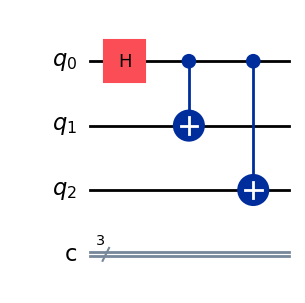

In [6]:
# Make a quantum circuit
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
display(qc.draw(output="mpl"))

Let's measure it.

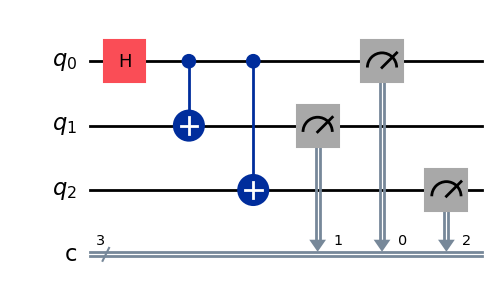

In [7]:
qc.measure(range(3), range(3))
qc.draw("mpl")

The circuit is ready to run on the simulator. You can check the result by running the cell below.

In [8]:
# Use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
results = aer_sim.run(qc, shots=shots).result()
sim_counts = results.get_counts()

print(sim_counts)

{'000': 1994, '111': 2102}


### Using Runtime to run this circuit

There are essentially 3 steps before running any quantum circuit on Qiskit Runtime.

1. Set a backend for executing your routine.
2. Create an ISA(Instruction Set Architecture) circuit using Transpiler.
3. Run the ISA circuit using `Sampler` over the QPU.

First, let's set a backend to use. We shall be getting the least busy one on the cloud.

In [9]:
# backend = service.least_busy(min_num_qubits=3)
backend = service.backend('ibm_brisbane')
# backend = service.least_busy(operational=True, simulator=False)
print(backend.name)

ibm_brisbane


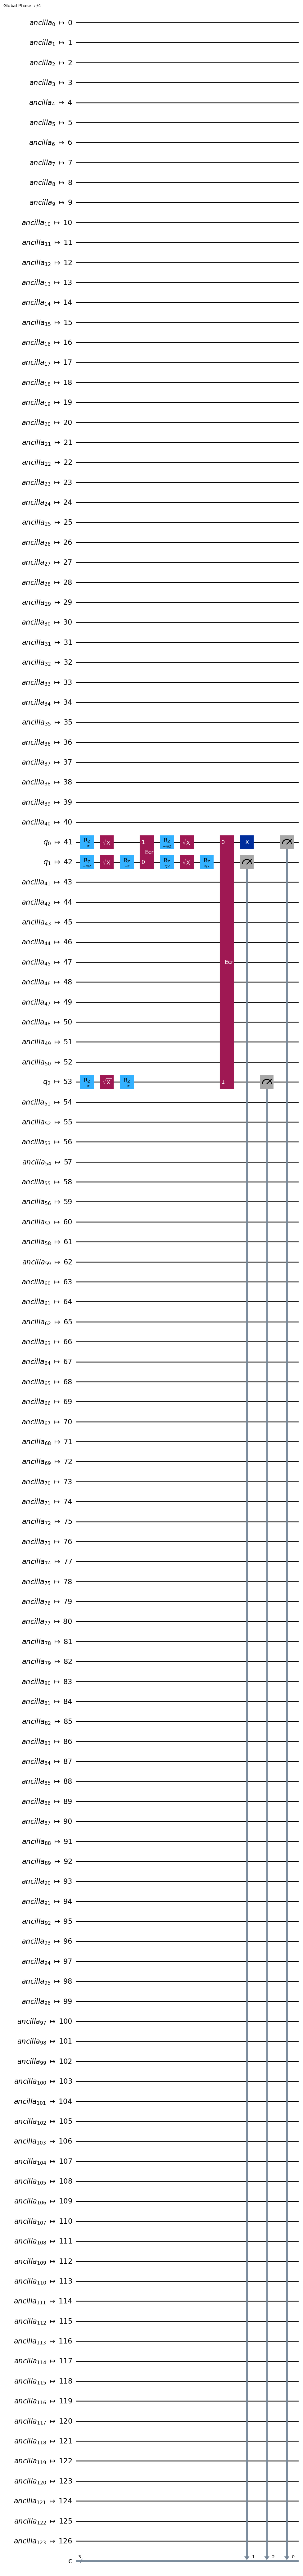

In [10]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl")

Let's define the `SamplerV2` here with job mode by passing the backend as the parameter for `mode`. 

In [11]:
sampler = SamplerV2(backend)
job = sampler.run([isa_circuit])
print(job.job_id())

cvdzsfdvawwg008952q0


After running the sampler, it returns a `RuntimeJob` object and we can extract the results from this object using the `result` method to check the returned data. We can then pick our individual data of interest from this returned result. Details are here: **[RuntimeJob](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/stubs/qiskit_ibm_runtime.RuntimeJob.html#qiskit_ibm_runtime.RuntimeJob)**. These jobs usually takes quite a lot of time to run, so let's fetch these results once these are completed. 

In [13]:
job = service.job('cvdzsfdvawwg008952q0')
result = job.result()

In [14]:
pub_result = result[0]
print(pub_result)

PubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=3>)), metadata={'circuit_metadata': {}})


In [15]:
sampler_counts = pub_result.data.c.get_counts()
print(sampler_counts)

{'000': 2011, '111': 1897, '010': 61, '100': 29, '001': 7, '110': 20, '101': 42, '011': 29}


Let's plot these results using histogram

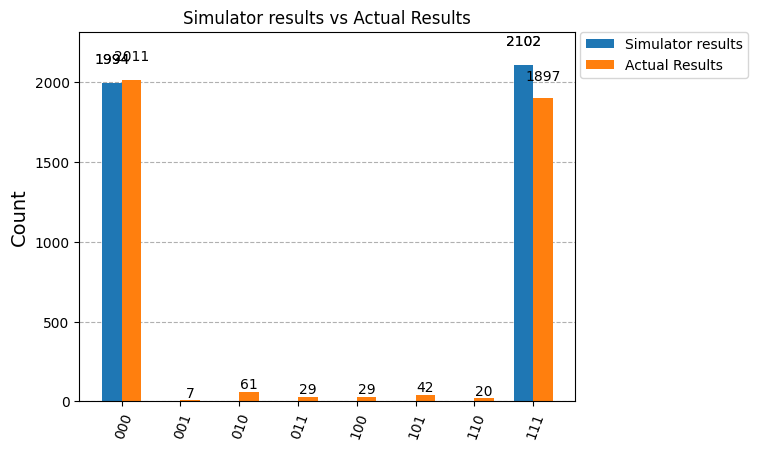

In [16]:
plot_histogram([sim_counts, sampler_counts], 
               legend=['Simulator results', 'Actual Results'],
               title="Simulator results vs Actual Results")

# Section 3.2: Example using Estimator

The Estimator gives you the calculated and interpreted expectation values of quantum operators. The Estimator requires that you have the circuit with 'no measurements'. The reason why is that in running algorithms like VQE, the Estimator will bind single-qubit rotations to get your hamiltonians so we cannot have measurements.

In [17]:
from qiskit.circuit.library import IQP

from qiskit.quantum_info import SparsePauliOp, random_hermitian
 
n_qubits = 127
 
mat = np.real(random_hermitian(n_qubits, seed=1234))
circuit = IQP(mat)
observable = SparsePauliOp("Z" * n_qubits)
print(f">>> Observable: {observable.paulis}")

>>> Observable: ['ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ...']


In [18]:
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(circuit)
isa_observable = observable.apply_layout(isa_circuit.layout)

In [19]:
estimator = EstimatorV2(backend)
job = estimator.run([(isa_circuit, isa_observable)])

In [20]:
print(job.job_id())

cvdztxk8w2g0008ecr80


In [23]:
result = job.result()
pub_result = result[0]

RuntimeJobFailureError: 'Unable to retrieve job result. Error code 1520; 55455 2-qubit gates exceeds the system limits by 1009.100% in combination with the option configuration. -- Split circuits/pubs into multiple jobs. -- https://ibm.biz/error_codes#1520'

In [24]:
print(f"Expectation value: {pub_result.data.evs}")

AttributeError: 'DataBin' object has no attribute 'evs'